# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Dfs

0.4 Preparatory work

    0.5.1 df_user_subset where each row = 1 user
    0.5.2 df_order_subset where each row = 1 order 
    0.5.3 Random sample of 30% of the data

0.5 Defining styles, formats, and commonly used variables

0.6 Exploration of data by region

    0.6.1 Users - total, gender, age, income
    0.6.2 Items - total, avg by order
    0.6.3 Gross sales - total, avg by order
    0.6.4 Departmental totals, proportions
    0.6.5 Ordering habits - day of week, time of day, frequency


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_all3.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all3.pkl'))

In [4]:
# Import data from 'dept_data.pkl'
dept_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'department_data.pkl'))

### 0.3 Exploring Original dfs

In [5]:
df.shape

(32434489, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 45 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,income_group,senior_citizen,two_parent_fam,single_parent
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False


In [8]:
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

All nulls have been previously accounted for and labeled appropriately with flags.

In [9]:
dept_data.shape

(21, 8)

In [10]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   department                   21 non-null     category
 1   department_id                21 non-null     int8    
 2   total_items_sold_by_dept     21 non-null     int64   
 3   total_spent_in_dept          21 non-null     float32 
 4   avg_price_per_item_in_dept   21 non-null     float32 
 5   total_orders_from_dept       21 non-null     int32   
 6   avg_items_per_order_by_dept  21 non-null     float32 
 7   n_unique_items_in_dept       21 non-null     int16   
dtypes: category(1), float32(3), int16(1), int32(1), int64(1), int8(1)
memory usage: 924.0 bytes


In [11]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,17289206.00,7.736552,1180461,1.893110,4006
1,other,2,36291,253708.00,6.990934,35056,1.035229,548
2,bakery,3,1172428,9208026.00,7.853809,878658,1.334339,1515
3,produce,4,9479291,75660936.00,7.981709,2409320,3.934426,1684
4,alcohol,5,153696,1251654.25,8.143701,84689,1.814828,1054


In [12]:
dept_data.isnull().sum()

department                     0
department_id                  0
total_items_sold_by_dept       0
total_spent_in_dept            0
avg_price_per_item_in_dept     0
total_orders_from_dept         0
avg_items_per_order_by_dept    0
n_unique_items_in_dept         0
dtype: int64

### 0.4.1 Subset df with each row = 1 user

In [17]:
# Create a temporary df to use for visualizations that should be per user
# rather than per item ordered
df_user_subset = pd.DataFrame()

In [18]:
df_user_subset = df[['user_id', 'loyalty_flag', 'spender_type', 'frequent_shopper', 'gender', 'age', 'n_dependants', 'fam_status', 'income', 'income_group', 'region', 'low_activity_flag', 'total_spent_in_lifetime', 'total_items_in_lifetime', 'avg_items_per_order_by_user', 'baby_parent', 'pet_owner', 'senior_citizen', 'two_parent_fam', 'single_parent']]

In [19]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
1,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
2,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
3,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
4,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False


In [20]:
df_user_subset.shape

(32434489, 20)

This has the same number of rows as the original df and only the 20 subsetted columns.

In [21]:
# Remove duplicate rows
df_user_subset = df_user_subset.drop_duplicates()

In [22]:
# Checking new shape
df_user_subset.shape

(206209, 20)

In [23]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,West,False,"1,465.60",195,13.93,False,False,True,True,False
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,West,False,721.40,88,7.33,False,False,False,True,False
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,South,False,147.70,18,3.60,False,False,False,True,False
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,West,True,340.00,37,9.25,False,False,True,False,False


Now we have a dataframe that reflects the users specifically.

### 0.4.2 Subset of df where each row = 1 order

In [24]:
# Create a temporary df to use for visualizations that should be per order
# rather than per item 
df_order_subset = pd.DataFrame()

In [25]:
df_order_subset = df[['order_id', 
                     'user_id', 
                     'order_day_of_week',
                     'order_hour_of_day',
                     'days_since_prior_order',
                     'first_order_of_new_customer',
                     'max_order', 
                     'loyalty_flag', 
                     'spender_type', 
                     'frequent_shopper', 
                     'gender', 
                     'age', 
                     'n_dependants', 
                     'fam_status', 
                     'income', 
                     'income_group', 
                     'region', 
                     'low_activity_flag', 
                     'total_spent_in_order', 
                     'total_spent_in_lifetime', 
                     'total_items_in_lifetime', 
                     'avg_items_per_order_by_user', 
                     'baby_parent', 
                     'pet_owner', 
                     'senior_citizen', 
                     'two_parent_fam', 
                     'single_parent']]

In [26]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False
1,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False
2,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False
3,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False
4,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False


In [27]:
df_order_subset.shape

(32434489, 27)

In [28]:
# Remove duplicate rows
df_order_subset = df_order_subset.drop_duplicates()

In [29]:
# Checking new shape
df_order_subset.shape

(3214874, 27)

In [30]:
# Confirming uniqueness of order_id s
df_order_subset['order_id'].nunique()

3214874

In [31]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False
5,2398795,1,3,7,15.00,False,10,New customer,Low spender,Regular customer,...,False,35.40,375.70,59,5.90,False,False,False,True,False
11,473747,1,3,12,21.00,False,10,New customer,Low spender,Regular customer,...,False,28.20,375.70,59,5.90,False,False,False,True,False
16,2254736,1,4,7,29.00,False,10,New customer,Low spender,Regular customer,...,False,26.00,375.70,59,5.90,False,False,False,True,False
21,431534,1,4,15,28.00,False,10,New customer,Low spender,Regular customer,...,False,57.00,375.70,59,5.90,False,False,False,True,False


Now we have a df with just the 3,214,874 orders each on their own row

In [32]:
# Let's add the number of items in each order to this df

# First we create a temp df to hold that information
temp = pd.DataFrame(df.groupby('order_id').add_to_cart_order.max())
temp.head()

,add_to_cart_order
order_id,
2,9
3,8
4,13
5,26
6,3


In [33]:
# Merge this data with the df_order_subset

df_order_subset = df_order_subset.merge(temp, on = ['order_id'], how='left', indicator = True)

In [34]:
# Confirming that all rows got a value
df_order_subset['_merge'].value_counts()

both          3214874
left_only           0
right_only          0
Name: _merge, dtype: int64

In [35]:
# Dropping the merge field as no longer necessary
df_order_subset = df_order_subset.drop(columns = '_merge')

In [36]:
# Rename column to be more meaningful for this df
df_order_subset = df_order_subset.rename(columns = {'add_to_cart_order':'n_items_in_order'})

In [37]:
# Confirming everything looks fine
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,n_items_in_order
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,31.60,375.70,59,5.90,False,False,False,True,False,5
1,2398795,1,3,7,15.00,False,10,New customer,Low spender,Regular customer,...,35.40,375.70,59,5.90,False,False,False,True,False,6
2,473747,1,3,12,21.00,False,10,New customer,Low spender,Regular customer,...,28.20,375.70,59,5.90,False,False,False,True,False,5
3,2254736,1,4,7,29.00,False,10,New customer,Low spender,Regular customer,...,26.00,375.70,59,5.90,False,False,False,True,False,5
4,431534,1,4,15,28.00,False,10,New customer,Low spender,Regular customer,...,57.00,375.70,59,5.90,False,False,False,True,False,8


### 0.4.4 Random sampling of 30% of data 

In [41]:
# Assign a random number between 0-1 to each row of the df
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [42]:
# Split the df into two samples
# big = 70% of df
# small = 30% of df
big = df[dev]
small = df[~dev]

In [43]:
# Compare the sample dfs to the original
len(df)

32434489

In [44]:
len(big) + len(small)

32434489

This random sampling can be used for any line charts where using the full df would be too memory-intensive.

### 0.5 Defining styles and label formats

In [13]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [14]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [15]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [16]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [95]:
# Setting up some commonly needed variables

# Calculating the gross sales for the entire df
total_gross=df['price'].sum()
total_gross

252418420.0

In [52]:
# Calculating the total items for the entire df
total_items=len(df)
total_items

32434489

In [53]:
# Calculating the total users 
total_users=len(df_user_subset)
total_users

206209

In [54]:
# Calculating the total orders 
total_orders=len(df_order_subset)
total_orders

3214874

### 0.6 Exploration of data by region

In [86]:
# Identifying which profile we are investigating
profile = 'region'
profile_label = 'Region'
labels = ['South', 'West', 'Midwest', 'Northeast']
colors =['gold', 'chocolate', 'burlywood', 'darkorange']

#### 0.6.1 Users - total, gender, income

In [46]:
# Calculating the count of users with each flag
user_count = pd.DataFrame(df_user_subset[profile].value_counts())
user_count

,region
South,68737
West,52565
Midwest,48519
Northeast,36388


In [66]:
user_percent = pd.DataFrame(user_count/total_users)
user_percent

,region
South,0.33
West,0.25
Midwest,0.24
Northeast,0.18


Text(0.5, 1.0, 'A third of our customers live in the south\n and just under a fifth in the northeast.')

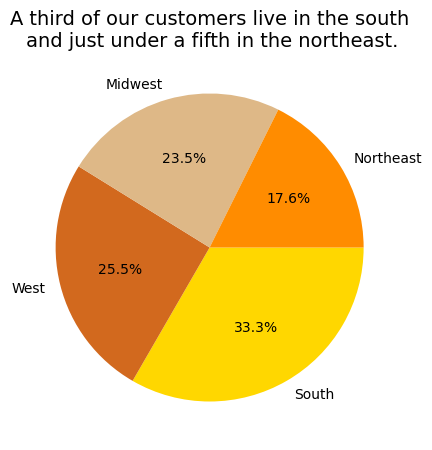

In [87]:
profile_pie = user_count.plot.pie(y=profile, 
                            figsize=(7,5), 
                            counterclock=False, 
                            colors = ['gold', 'chocolate', 'burlywood', 'darkorange'],
                            legend=False, 
                            labels = labels, 
                            autopct='%1.1f%%')
plt.ylabel("")

plt.title ("A third of our customers live in the south\n and just under a fifth in the northeast.", 
          size=14)

In [88]:
# Create filename for export
filename = profile+'_pie.png'
filename

'region_pie.png'

In [90]:
# Exporting bar chart
profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [55]:
# Checking the distribution of genders by profile
gender_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['gender'],
                            normalize='index')
gender_count

gender,Female,Male
region,,
Midwest,0.50,0.50
Northeast,0.49,0.51
South,0.50,0.50
West,0.50,0.50


In [56]:
# Checking the distribution of incomes by profile
income_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['income_group'],
                            normalize='index')
income_count

income_group,Affluent,Low income,Middle class,Upper middle class
region,,,,
Midwest,0.00,0.16,0.72,0.11
Northeast,0.00,0.16,0.72,0.11
South,0.00,0.17,0.72,0.11
West,0.00,0.17,0.72,0.11


In [57]:
# Checking the distribution of family status by profile
fam_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['fam_status'],
                            normalize='index')
fam_count

fam_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,0.08,0.05,0.70,0.16
Northeast,0.09,0.04,0.70,0.17
South,0.09,0.05,0.70,0.16
West,0.09,0.05,0.70,0.16


####     0.6.2 Items - total, avg by order

In [58]:
item_count = pd.DataFrame(df[profile].value_counts())
item_count

,region
South,10801796
West,8300481
Midwest,7603861
Northeast,5728351


In [93]:
item_percent = pd.DataFrame(item_count/total_items)
item_percent

,region
South,0.33
West,0.26
Midwest,0.23
Northeast,0.18


In [59]:
# Compare items per user
items_per_user = pd.DataFrame(item_count/user_count)
items_per_user

,region
South,157.15
West,157.91
Midwest,156.72
Northeast,157.42


In [63]:
avg_order = df_order_subset.groupby(profile).n_items_in_order.mean()
avg_order

region
Midwest     10.08
Northeast   10.10
South       10.08
West        10.10
Name: n_items_in_order, dtype: float64

#### 0.6.3 Gross sales - total, avg by order

In [94]:
gross_by_profile = pd.DataFrame(df.groupby(profile).price.sum())
gross_by_profile

,price
region,
Midwest,"59,190,872.00"
Northeast,"44,528,852.00"
South,"84,105,400.00"
West,"64,593,248.00"


In [96]:
gross_percent_by_profile = gross_by_profile/total_gross
gross_percent_by_profile

,price
region,
Midwest,0.23
Northeast,0.18
South,0.33
West,0.26


In [97]:
avg_order_gross_by_profile = df_order_subset.groupby(profile).total_spent_in_order.mean()
avg_order_gross_by_profile

region
Midwest     78.47
Northeast   78.51
South       78.48
West        78.61
Name: total_spent_in_order, dtype: float32

#### 0.6.4 Departmental totals, proportions

In [98]:
gross_by_profile_dept = pd.DataFrame(df.groupby([profile, 'department_id']).price.sum())
gross_by_profile_dept

price
region  department_id              
Midwest 1.00           4,049,209.50
        2.00              60,509.20
        3.00           2,153,036.00
        4.00          17,785,238.00
        5.00             293,906.31
...                             ...
West    17.00          1,391,053.75
        18.00            807,742.81
        19.00          3,175,640.50
        20.00          2,091,754.25
        21.00            149,358.91

[84 rows x 1 columns]

In [99]:
# Rename column to be more desciptive
gross_by_profile_dept.rename(columns={'price':'gross_sales'}, inplace=True)

In [100]:
# Reset the index so the correct column headers will appear
gross_by_profile_dept = gross_by_profile_dept.reset_index()

In [101]:
gross_by_profile_dept

,region,department_id,gross_sales
0,Midwest,1.00,"4,049,209.50"
1,Midwest,2.00,"60,509.20"
2,Midwest,3.00,"2,153,036.00"
3,Midwest,4.00,"17,785,238.00"
4,Midwest,5.00,"293,906.31"
...,...,...,...
79,West,17.00,"1,391,053.75"
80,West,18.00,"807,742.81"
81,West,19.00,"3,175,640.50"
82,West,20.00,"2,091,754.25"


In [103]:
# Pulling each of the profile groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

south_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]=='South'])
west_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]=='West'])
midwest_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]=='Midwest'])
northeast_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]=='Northeast'])

In [104]:
# Rename columns to be more desciptive
south_gross_df.rename(columns={'gross_sales':'south_gross'}, inplace=True)
west_gross_df.rename(columns={'gross_sales':'west_gross'}, inplace=True)
midwest_gross_df.rename(columns={'gross_sales':'midwest_gross'}, inplace=True)
northeast_gross_df.rename(columns={'gross_sales':'northeast_gross'}, inplace=True)

In [106]:
# Removing unnecessary columns
south_gross_df = south_gross_df.drop(columns = [profile])
west_gross_df = west_gross_df.drop(columns = [profile])
midwest_gross_df = midwest_gross_df.drop(columns = [profile])
northeast_gross_df = northeast_gross_df.drop(columns = [profile])

In [108]:
# Merge temp dfs
combo_gross_by_flag = south_gross_df.merge(west_gross_df, on = 'department_id', how='left')

In [109]:
combo_gross_by_flag = combo_gross_by_flag.merge(midwest_gross_df, on = 'department_id', how='left')

In [110]:
combo_gross_by_flag = combo_gross_by_flag.merge(northeast_gross_df, on = 'department_id', how='left')

In [111]:
# Merge dept name to allow for easier visualizations
combo_gross_by_flag = pd.merge(combo_gross_by_flag, dept_data[['department_id', 'department']], on = ['department_id'], how='left')

In [113]:
# Set the department name to be used as the index
combo_gross_by_flag = combo_gross_by_flag.set_index('department')

In [114]:
# Drop the department_id column so it doesn't interfere with visualizations
combo_gross_by_flag = combo_gross_by_flag.drop(columns = ['department_id'])

In [115]:
# Sort departments by alphabetical order for more consistent look to axes
combo_gross_by_flag_sort = combo_gross_by_flag.sort_values('department', ascending=False)

In [116]:
combo_gross_by_flag_sort

,south_gross,west_gross,midwest_gross,northeast_gross
department,,,,
snacks,"4,091,584.00","3,175,640.50","2,880,185.00","2,198,128.75"
produce,"25,234,456.00","19,349,258.00","17,785,238.00","13,291,983.00"
pets,"245,313.20","203,042.09","174,773.91","147,759.20"
personal care,"1,199,436.75","899,735.19","844,830.62","629,170.19"
pantry,"4,987,105.50","3,857,656.00","3,541,151.75","2,634,747.50"
other,"83,463.30","64,347.40","60,509.20","45,388.10"
missing,"199,948.09","149,358.91","142,966.00","106,572.20"
meat seafood,"3,845,538.25","2,975,240.25","2,702,927.50","2,027,864.25"
international,"690,424.31","531,261.00","486,821.81","359,965.59"




Create a proportional table

In [117]:
# Merging the total per department to create a table of proportions/percents
# of gross sales by price_range
combo_gross_by_dept_prop = pd.merge(combo_gross_by_flag_sort, dept_data[['department', 'total_spent_in_dept']], on = ['department'], how='left')

In [118]:
# Set the department name to be used as the index
combo_gross_by_dept_prop = combo_gross_by_dept_prop.set_index('department')

In [119]:
combo_gross_by_dept_prop.head()

,south_gross,west_gross,midwest_gross,northeast_gross,total_spent_in_dept
department,,,,,
snacks,"4,091,584.00","3,175,640.50","2,880,185.00","2,198,128.75","12,345,538.00"
produce,"25,234,456.00","19,349,258.00","17,785,238.00","13,291,983.00","75,660,936.00"
pets,"245,313.20","203,042.09","174,773.91","147,759.20","770,888.38"
personal care,"1,199,436.75","899,735.19","844,830.62","629,170.19","3,573,172.75"
pantry,"4,987,105.50","3,857,656.00","3,541,151.75","2,634,747.50","15,020,661.00"


In [120]:
# Creating proportional fields
combo_gross_by_dept_prop['south_prop'] = combo_gross_by_dept_prop['south_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop['west_prop'] = combo_gross_by_dept_prop['west_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop['midwest_prop'] = combo_gross_by_dept_prop['midwest_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop['northeast_prop'] = combo_gross_by_dept_prop['northeast_gross']/combo_gross_by_dept_prop['total_spent_in_dept']

In [121]:
combo_gross_by_dept_prop.head()

,south_gross,west_gross,midwest_gross,northeast_gross,total_spent_in_dept,south_prop,west_prop,midwest_prop,northeast_prop
department,,,,,,,,,
snacks,"4,091,584.00","3,175,640.50","2,880,185.00","2,198,128.75","12,345,538.00",0.33,0.26,0.23,0.18
produce,"25,234,456.00","19,349,258.00","17,785,238.00","13,291,983.00","75,660,936.00",0.33,0.26,0.24,0.18
pets,"245,313.20","203,042.09","174,773.91","147,759.20","770,888.38",0.32,0.26,0.23,0.19
personal care,"1,199,436.75","899,735.19","844,830.62","629,170.19","3,573,172.75",0.34,0.25,0.24,0.18
pantry,"4,987,105.50","3,857,656.00","3,541,151.75","2,634,747.50","15,020,661.00",0.33,0.26,0.24,0.18


In [122]:
# Drop the columns that are no longer needed
combo_gross_by_dept_prop = combo_gross_by_dept_prop.drop(columns = ['south_gross', 'west_gross', 'midwest_gross', 'northeast_gross', 'total_spent_in_dept' ])


In [123]:
combo_gross_by_dept_prop

,south_prop,west_prop,midwest_prop,northeast_prop
department,,,,
snacks,0.33,0.26,0.23,0.18
produce,0.33,0.26,0.24,0.18
pets,0.32,0.26,0.23,0.19
personal care,0.34,0.25,0.24,0.18
pantry,0.33,0.26,0.24,0.18
other,0.33,0.25,0.24,0.18
missing,0.33,0.25,0.24,0.18
meat seafood,0.33,0.26,0.23,0.18
international,0.33,0.26,0.24,0.17


#### 0.6.5 Ordering habits - day of week, time of day, frequency

In [124]:
#Comparing day of the week by profile
dow_profile = pd.DataFrame(df_order_subset.groupby(profile).order_day_of_week.value_counts().sort_index())
dow_profile

order_day_of_week
region    order_day_of_week                   
Midwest   0                             131172
          1                             130443
          2                             103918
          3                              96665
          4                              93709
          5                             100026
          6                              98394
Northeast 0                              98428
          1                              98519
          2                              77977
          3                              73046
          4                              70897
          5                              75150
          6                              73168
South     0                             185055
          1                             186093
          2                             147403
          3                             137517
          4                             133887
          5                             141862
          6                             139824
West      0                             143117
          1                             141650
          2                             112657
          3                             105172
          4                             102719
          5                             108944
          6                             107462

In [126]:
# Rename second column to be more meaningful
dow_profile = dow_profile.rename(columns={'order_day_of_week':'dow_count'})

In [127]:
# Reset the index so the column headers show up correctly
dow_profile = dow_profile.reset_index()

In [128]:
dow_profile

,region,order_day_of_week,dow_count
0,Midwest,0,131172
1,Midwest,1,130443
2,Midwest,2,103918
3,Midwest,3,96665
4,Midwest,4,93709
5,Midwest,5,100026
6,Midwest,6,98394
7,Northeast,0,98428
8,Northeast,1,98519
9,Northeast,2,77977


In [129]:
# Calculating the total orders by loyalty status
dow_profile.loc[dow_profile[profile]=='South', 'total_orders'] = dow_profile[dow_profile[profile]=='South'].dow_count.sum()
dow_profile.loc[dow_profile[profile]=='West', 'total_orders'] = dow_profile[dow_profile[profile]=='West'].dow_count.sum()
dow_profile.loc[dow_profile[profile]=='Midwest', 'total_orders'] = dow_profile[dow_profile[profile]=='Midwest'].dow_count.sum()
dow_profile.loc[dow_profile[profile]=='Northeast', 'total_orders'] = dow_profile[dow_profile[profile]=='Northeast'].dow_count.sum()

dow_profile

,region,order_day_of_week,dow_count,total_orders
0,Midwest,0,131172,"754,327.00"
1,Midwest,1,130443,"754,327.00"
2,Midwest,2,103918,"754,327.00"
3,Midwest,3,96665,"754,327.00"
4,Midwest,4,93709,"754,327.00"
5,Midwest,5,100026,"754,327.00"
6,Midwest,6,98394,"754,327.00"
7,Northeast,0,98428,"567,185.00"
8,Northeast,1,98519,"567,185.00"
9,Northeast,2,77977,"567,185.00"


In [130]:
# Calculating the percent of order by day by loyalty status
dow_profile['percent_of_total_by_flag'] = (dow_profile['dow_count']/dow_profile['total_orders'])*100
dow_profile

,region,order_day_of_week,dow_count,total_orders,percent_of_total_by_flag
0,Midwest,0,131172,"754,327.00",17.39
1,Midwest,1,130443,"754,327.00",17.29
2,Midwest,2,103918,"754,327.00",13.78
3,Midwest,3,96665,"754,327.00",12.81
4,Midwest,4,93709,"754,327.00",12.42
5,Midwest,5,100026,"754,327.00",13.26
6,Midwest,6,98394,"754,327.00",13.04
7,Northeast,0,98428,"567,185.00",17.35
8,Northeast,1,98519,"567,185.00",17.37
9,Northeast,2,77977,"567,185.00",13.75


In [131]:
# Creating three temp dfs to use for bar chart
south_dow_percent = dow_profile.loc[dow_profile[profile] =='South', ['order_day_of_week', 'percent_of_total_by_flag']]    
west_dow_percent = dow_profile.loc[dow_profile[profile] =='West', ['order_day_of_week', 'percent_of_total_by_flag']]    
midwest_dow_percent = dow_profile.loc[dow_profile[profile] =='Midwest', ['order_day_of_week', 'percent_of_total_by_flag']]      
northeast_dow_percent = dow_profile.loc[dow_profile[profile] =='Northeast', ['order_day_of_week', 'percent_of_total_by_flag']]      


In [135]:
# Use order_day_of_week as index
south_dow_percent = south_dow_percent.set_index('order_day_of_week')
west_dow_percent = west_dow_percent.set_index('order_day_of_week')
midwest_dow_percent = midwest_dow_percent.set_index('order_day_of_week')
northeast_dow_percent = northeast_dow_percent.set_index('order_day_of_week')

In [136]:
# Name columns to be distinctive
south_dow_percent = south_dow_percent.rename(columns={'percent_of_total_by_flag':'south_dow_perc'})
west_dow_percent = west_dow_percent.rename(columns={'percent_of_total_by_flag':'west_dow_perc'})
midwest_dow_percent = midwest_dow_percent.rename(columns={'percent_of_total_by_flag':'midwest_dow_perc'})
northeast_dow_percent = northeast_dow_percent.rename(columns={'percent_of_total_by_flag':'northeast_dow_perc'})

In [137]:
# Merge back into one df for visualization
combo_dow_percent = pd.merge(south_dow_percent, west_dow_percent, on='order_day_of_week', how='left' )

In [138]:
combo_dow_percent = pd.merge(combo_dow_percent, midwest_dow_percent, on='order_day_of_week', how='left')

In [139]:
combo_dow_percent = pd.merge(combo_dow_percent, northeast_dow_percent, on='order_day_of_week', how='left')

In [140]:
combo_dow_percent

,south_dow_perc,west_dow_perc,midwest_dow_perc,northeast_dow_perc
order_day_of_week,,,,
0,17.27,17.42,17.39,17.35
1,17.37,17.24,17.29,17.37
2,13.75,13.71,13.78,13.75
3,12.83,12.80,12.81,12.88
4,12.49,12.50,12.42,12.50
5,13.24,13.26,13.26,13.25
6,13.05,13.08,13.04,12.90


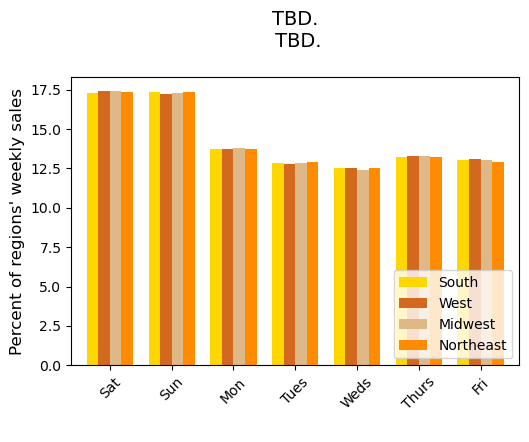

In [143]:
# Create a bar chart showing when different loyalty groups shop most often
dow_bar_by_loyalty = combo_dow_percent.plot(kind='bar', width=0.75, color = colors)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
child

# Format labels and titles for clarity
plt.ylabel('Percent of regions\' weekly sales', size=12)
plt.xticks(dow_xticks, dow, rotation = 45)
plt.xlabel(" ")
plt.xticks(rotation=45)
plt.legend(labels = labels, loc = 'lower right')
plt.title ("TBD.\n TBD.\n", size=14)

plt.show()

There isn't really any variation by region by day or order, so we'll look at ordering time of day


In [144]:
# Creating three-column subset of the 30% df
df_profile_sm = pd.DataFrame(df_order_subset.groupby([profile, 'order_hour_of_day']).total_spent_in_order.sum())

In [145]:
# First reset the index for manipulation of data
df_profile_sm = df_profile_sm.reset_index()

In [146]:
df_profile_sm.head()

,region,order_hour_of_day,total_spent_in_order
0,Midwest,0,"397,471.59"
1,Midwest,1,"213,926.41"
2,Midwest,2,"133,125.41"
3,Midwest,3,"92,527.10"
4,Midwest,4,"99,605.50"


In [164]:
# Pulling each of the loyalty_flag groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

south_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]=='South'])
west_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]=='West'])
midwest_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]=='Midwest'])
northeast_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]=='Northeast'])

In [165]:
# Rename columns to be more desciptive
south_hod.rename(columns={'total_spent_in_order':'south_total_hod'}, inplace=True)
west_hod.rename(columns={'total_spent_in_order':'west_total_hod'}, inplace=True)
midwest_hod.rename(columns={'total_spent_in_order':'midwest_total_hod'}, inplace=True)
northeast_hod.rename(columns={'total_spent_in_order':'northeast_total_hod'}, inplace=True)

In [166]:
# Removing unnecessary columns
south_hod = south_hod.drop(columns = [profile])
west_hod = west_hod.drop(columns = [profile])
midwest_hod = midwest_hod.drop(columns = [profile])
northeast_hod = northeast_hod.drop(columns = [profile])

In [167]:
# Merge temp dfs
combo_profile_hod = south_hod.merge(west_hod, on = 'order_hour_of_day', how='left')

In [168]:
combo_profile_hod = combo_profile_hod.merge(midwest_hod, on = 'order_hour_of_day', how='left')

In [169]:
combo_profile_hod = combo_profile_hod.merge(northeast_hod, on = 'order_hour_of_day', how='left')

In [170]:
# Set the department name to be used as the index
combo_profile_hod = combo_profile_hod.set_index('order_hour_of_day')

In [171]:
combo_profile_hod.shape

(24, 4)

In [172]:
combo_profile_hod.head()

,south_total_hod,west_total_hod,midwest_total_hod,northeast_total_hod
order_hour_of_day,,,,
0,"571,922.50","439,090.69","397,471.59","300,101.81"
1,"296,311.50","226,060.09","213,926.41","166,676.00"
2,"170,905.41","139,990.30","133,125.41","96,918.70"
3,"135,987.80","100,369.50","92,527.10","72,446.70"
4,"140,819.30","102,554.80","99,605.50","74,271.90"


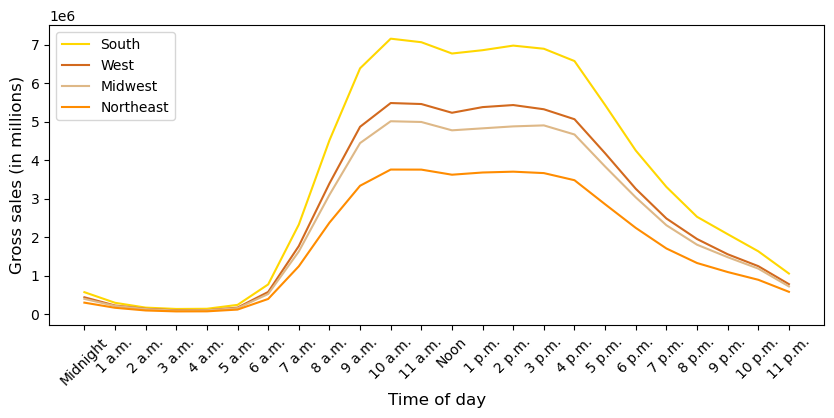

In [176]:

# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(10,5))

# Creating the plot
profile_hod_line = sns.lineplot(data= combo_profile_hod[['south_total_hod', 'west_total_hod', 'midwest_total_hod', 'northeast_total_hod']], 
                            palette= colors, 
                            dashes = False )

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.legend(labels = labels, 
           loc='upper left', ncol=1)
plt.xticks(hod_xticks, hod, rotation = 45)
plt.xlabel("Time of day", size = 12 )

plt.ylabel("Gross sales (in millions)", size = 12 )

#plt.title ("TBD.", size=16)

plt.show()

In [177]:
# Create filename for export
filename = profile+'_gross_hod.png'

In [178]:
filename

'region_gross_hod.png'

In [179]:
# Exporting bar chart
profile_hod_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

Compare profile with frequency of shopping

In [182]:
# Create a cross tabulation to show the proportions of the 
# loyalty groups in each frequent_shopper category
cross_tab_profile_freq = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['frequent_shopper'],
                            normalize='index')
cross_tab_profile_freq

frequent_shopper,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,0.41,0.28,0.31
Northeast,0.41,0.28,0.31
South,0.41,0.28,0.31
West,0.42,0.27,0.31
